In [1]:
from ANIBBLE_X import draw_from_networkx_graphs_list
import networkx as nx
import numpy as np

/home/manie/Documents/Stage/graph_visualization/ANIBBLE_X/graph_visualisation_toolskit.py:2: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


# Tuto draw_from_networkx_graphs_list

### Create 2 networkx graph with attributs

In [2]:
G1 = nx.gnr_graph(10, 0.1)
nx.draw(G1)

In [3]:
G2 = nx.gnr_graph(10, 0.1)
nx.draw(G2)

Add labels to nodes

In [4]:
for i, node in enumerate(G1.nodes):
    G1.nodes[i]['label'] = "node" + str(i)
    
for i, node in enumerate(G2.nodes):
    G2.nodes[i]['label'] = "node" + str(i)

Add labels to edges:
+ the edge's id
+ a random integer 

In [5]:
for edge in G1.edges:
    G1.edges[edge]['labels'] = "edge" + str(edge)
    
for edge in G2.edges:
    G2.edges[edge]['labels'] = "edge" + str(edge)
    
for edge in G1.edges:
    G1.edges[edge]['random_label'] = "random" + str(np.random.randint(0,100))
    
for edge in G2.edges:
    G2.edges[edge]['random_label'] = "random" + str(np.random.randint(0,100))

Add group membership regarding: 
+ The nodes' id parity

In [6]:
for i, node in enumerate(G2.nodes):
    if int(node)%2 == 0:
        G2.nodes[i]['group_parity'] = "even"
    else:
        G2.nodes[i]['group_parity'] = "odd"       
    
for i, node in enumerate(G1.nodes):
    if int(node)%2 == 0:
        G1.nodes[i]['group_parity'] = "even"
    else:
        G1.nodes[i]['group_parity'] = "odd"       
        

Creation of the list of nodes

In [7]:
graph_list = [G1, G2]

### Creation of the html graph

Save directory

In [8]:
import os
save_dir = "graphs"
if save_dir not in os.listdir("."):
    os.mkdir(save_dir)
save_path = save_dir + "/graph_test_2_networkx.html"

The user should provide **a list of dictionnary** containing each the attributes to be selected when converting the networkx graph into an html graph based on the following elements: node names, link labels and node groups.   

The keys to the dictionary are as follows:
+ label_node : a list of attributs from networkx graph nodes to concatenate to form the label of a node
+ label_edge : a list of attributs from networkx graph edges to concatenate to form the label of an edge
+ group_node : a list of attributs from networkx graph nodes to concatenate to form the group of a node (group are display in different colors)

This dictionnary is **not mandatory** to plot the graph. By default, dic_items is empty. It will convert nodes from networkx and does not provide groups and label. 

There are other more specific options such as
+ "separator_group" to change separators in group names 
+ "separator_name" to change name separators
+ "separator_label" to change label separators
Otherwise the default separator is "_".

There is a special **"cut" option** which defaults to "No" but can be changed to a number n which allows n letters of each to be used when cutting the name.

In [9]:
dic_items_1 = {}
dic_items_1["label_node"] = ['label']
dic_items_1["label_edge"] = ['labels','random_label']
dic_items_1["group_node"] = ['group_parity']

dic_items_2 = {}
dic_items_2["label_node"] = ['label']
dic_items_2["label_edge"] = ['labels','random_label']
dic_items_2["group_node"] = ['group_parity']

dic_items_list = [dic_items_1, dic_items_2]

In [10]:
draw_from_networkx_graphs_list(graph_list, dic_items_list = dic_items_list, saving_localisation = save_path)

### Changing the design

This dictionnary is **not mandatory**. There are default settings. You can use the following parameters:
+ "color_link": to change the edges color
+ "color_text": to change the node text color
+ "color_label": to change the label text color
+ "shape": to change the shape of the node ('stars', 'circle', 'ellipse'...)
+ "mobility": to change whether the graph may move or not
+ "legend_bool": to have a legend or not


To use more colors:
+ [Link for more colors](https://htmlcolorcodes.com/fr/)
+ [Link for more colors 2](https://www.w3schools.com/colors/colors_picker.asp)

In [11]:
dic_design= {}
dic_design["color_link"] = "#0a0417"
dic_design["color_text"] = "#680677"
dic_design["color_label"] = "#680726"
dic_design["shape"] = 'ellipse'
dic_design["mobility"] = True
dic_design["legend_bool"] = True

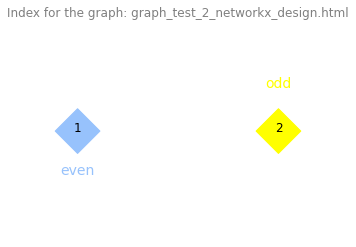

In [12]:
draw_from_networkx_graphs_list(graph_list, dic_design = dic_design, dic_items_list = dic_items_list, saving_localisation = save_dir + "/graph_test_2_networkx_design.html")

### Some information:
+ Be careful, it is not because you put node 1 with group 2 and node 1 with group 3 that there will be 2 nodes. It is necessary to take care that **the names are different**. You have to put node1_gr2 and node_gr3 in the names. Otherwise there will be a loss of information! The creation is **done on the nodes**.